In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-clustering/segmentation data.csv
/kaggle/input/customer-clustering/segmentation data legend.xlsx


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
segmentation_data = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')

In [4]:
segmentation_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [5]:
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
X = segmentation_data.drop(['ID', 'Income'], axis=1)
X

,Sex,Marital status,Age,Education,Occupation,Settlement size
0,0,0,67,2,1,2
1,1,1,22,1,1,2
2,0,0,49,1,0,0
3,0,0,45,1,1,1
4,0,0,53,1,1,1
...,...,...,...,...,...,...
1995,1,0,47,1,0,0
1996,1,1,27,1,1,0
1997,0,0,31,0,0,0
1998,1,1,24,1,0,0


In [7]:
scaler = MinMaxScaler()

In [8]:
X_scaled = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
X_scaled

,Sex,Marital status,Age,Education,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.5,0.5
...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.0,0.0
1996,1.0,1.0,0.155172,0.333333,0.5,0.0
1997,0.0,0.0,0.224138,0.000000,0.0,0.0
1998,1.0,1.0,0.103448,0.333333,0.0,0.0


In [9]:
corr = X_scaled.corr()
corr

,Sex,Marital status,Age,Education,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.064524,0.034732
Occupation,-0.202491,-0.029490,0.108388,0.064524,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.571795,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

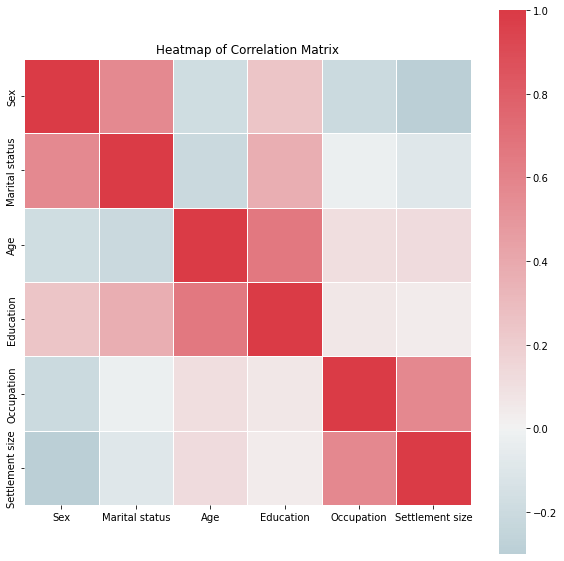

In [10]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')

In [11]:
wcss = []
n_clusters_list = list(range(1, 15))

for i in n_clusters_list:
    print(i)
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=0)
    kmeans.fit(X_scaled)
    print(round(kmeans.inertia_, 3))
    wcss.append(kmeans.inertia_)

1
1691.528
2
992.182
3
776.123
4
595.761
5
482.109
6
375.651
7
334.959
8
301.238
9
272.847
10
255.342
11
234.821
12
215.722
13
200.519
14
183.914


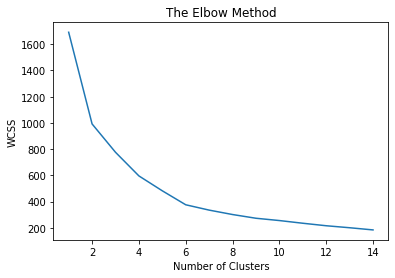

In [12]:
plt.plot(n_clusters_list, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=0)

In [14]:
kmeans_pred = kmeans.fit_predict(X_scaled)
X['label'] = kmeans_pred

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
X.groupby('label').agg(['min', 'mean', 'max']).style.format(thousands=',', precision=3)

In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
dist = 1 - cosine_similarity(X_scaled)

pca = PCA(3)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(2000, 3)

In [19]:
pca.explained_variance_ratio_

array([0.65531899, 0.20734325, 0.06127453])

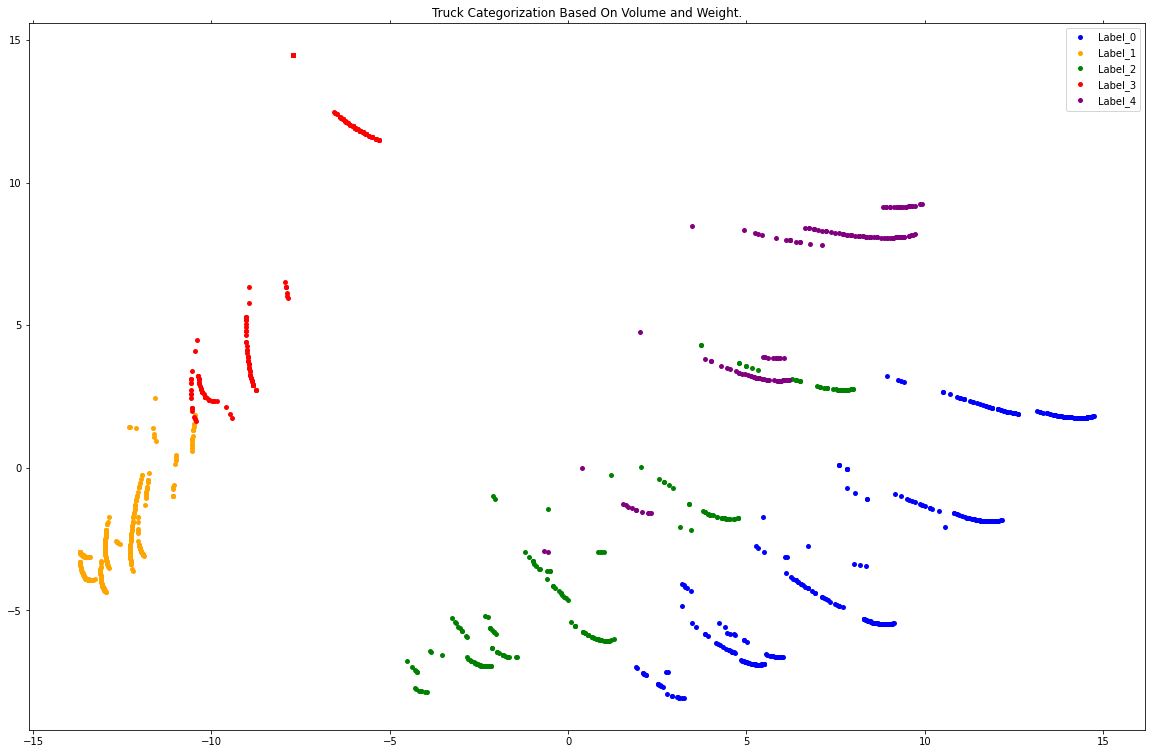

In [20]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {
    0: 'blue',
    1: 'orange',
    2: 'green', 
    3: 'red', 
    4: 'purple',  
    5: 'darkblue',
    6: 'pink',
    7: 'black'
}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':X['label']}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], label='Label_' + str(name), mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')
    
ax.legend()
ax.set_title("Truck Categorization Based On Volume and Weight.")
plt.show()